# Patterns over time
## E X P L O R AT O R Y D ATA A N A LY S I S I N P Y T H O N

In [11]:
# importando 
import pandas as pd
import seaborn  as sns

In [2]:
divorce = pd.read_csv("../datasets/divorce.csv")

In [3]:
divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


In [4]:
divorce.dtypes

divorce_date          object
dob_man               object
education_man         object
income_man           float64
dob_woman             object
education_woman       object
income_woman         float64
marriage_date         object
marriage_duration    float64
num_kids             float64
dtype: object

## Converting to DateTime data

Repare que o tipo **marriage_date**  é tipo **object**

In [5]:
divorce = pd.read_csv("../datasets/divorce.csv", parse_dates=["marriage_date"])
divorce.dtypes

divorce_date                 object
dob_man                      object
education_man                object
income_man                  float64
dob_woman                    object
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

Repare que agora temos que **object** transofrmado em **datetime64[ns]**

Outra forma, é usamos **pd.to_datetime**


In [6]:
divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])
divorce.dtypes

divorce_date                 object
dob_man                      object
education_man                object
income_man                  float64
dob_woman                    object
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

## Transformando colunas dia, mês e ano em data
Vamos supor que tenhamos coluna month, day e year, podemos pegar essas 3 coluna e unir como data

~~~ python
divorce["marriage_date"] = pd.to_datetime(divorce[["month", "day", "year"]])
~~~


## Acessando dia, mes e ano 

usaremos **dt.month, dt.day e dt.year**

In [9]:
divorce["marriage_month"] = divorce["marriage_date"].dt.month
divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids,marriage_month
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0,6
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN,9
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0,2
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN,5
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN,8


## Visualizing patterns over time

NameError: name 'plt' is not defined

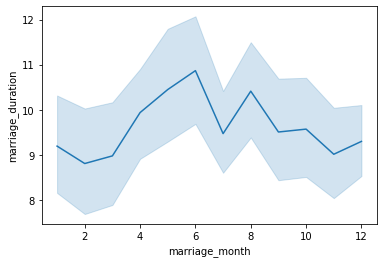

In [12]:
sns.lineplot(data=divorce, x="marriage_month", y="marriage_duration")
plt.show()

# Correlation

In [13]:
divorce.corr()

/tmp/ipykernel_50344/3332814392.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  divorce.corr()


,income_man,income_woman,marriage_duration,num_kids,marriage_month
income_man,1.000000,0.318047,0.085321,0.040848,0.013652
income_woman,0.318047,1.000000,0.078677,-0.018015,0.041441
marriage_duration,0.085321,0.078677,1.000000,0.447358,0.001433
num_kids,0.040848,-0.018015,0.447358,1.000000,-0.000551
marriage_month,0.013652,0.041441,0.001433,-0.000551,1.000000


/tmp/ipykernel_50344/1320021249.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(divorce.corr(), annot=True)


NameError: name 'plt' is not defined

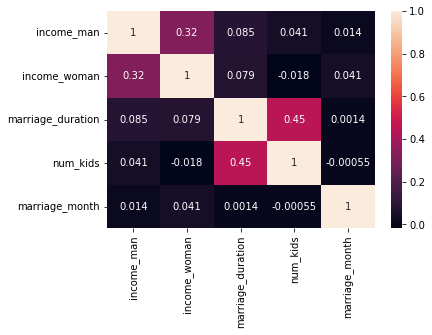

In [14]:
sns.heatmap(divorce.corr(), annot=True)
plt.show()

NameError: name 'plt' is not defined

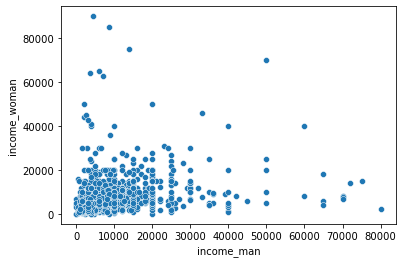

In [15]:
sns.scatterplot(data=divorce, x="income_man", y="income_woman")
plt.show()

NameError: name 'plt' is not defined

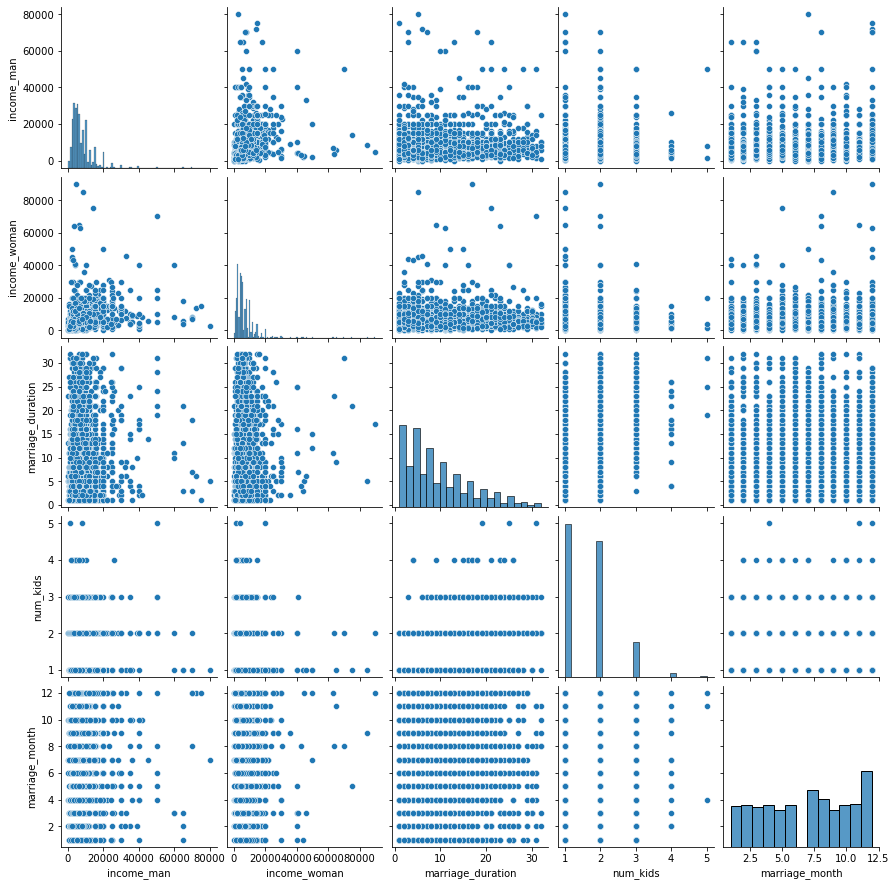

In [16]:
sns.pairplot(data=divorce)
plt.show()

NameError: name 'plt' is not defined

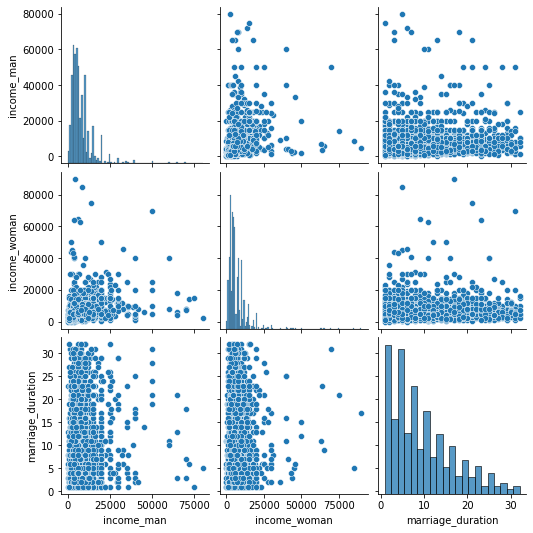

In [17]:
sns.pairplot(data=divorce, vars=["income_man", "income_woman", "marriage_duration"])
plt.show()

# Factor relationships and distributions

In [18]:
# Level of education: male partner
divorce["education_man"].value_counts()

Professional    1313
Preparatory      501
Secondary        288
Primary          100
None               4
Other              3
Name: education_man, dtype: int64

NameError: name 'plt' is not defined

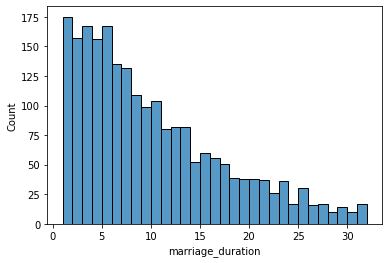

In [19]:
# Exploring categorical relationships
sns.histplot(data=divorce, x="marriage_duration", binwidth=1)
plt.show()

NameError: name 'plt' is not defined

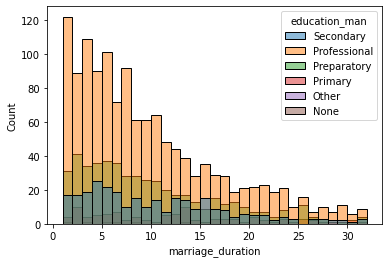

In [21]:
# Exploring categorical relationships
sns.histplot(data=divorce, x="marriage_duration", hue="education_man", binwidth=1)
plt.show()

NameError: name 'plt' is not defined

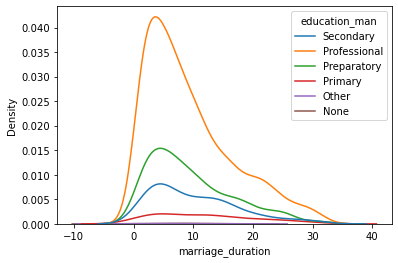

In [22]:
# Kernel Density Estimate (KDE) plots
sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man")
plt.show()


NameError: name 'plt' is not defined

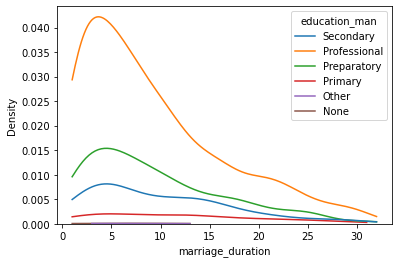

In [23]:
# Kernel Density Estimate (KDE) plots
sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man", cut=0)
plt.show()

NameError: name 'plt' is not defined

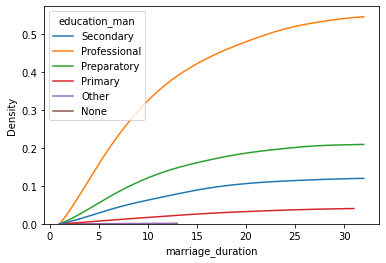

In [24]:
# Cumulative KDE plots
sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man", cut=0, cumulative=True)
plt.show()

## Relationship between marriage age and education
### Is there a relationship between age at marriage and education level?

In [27]:
divorce["dob_man"] = pd.to_datetime(divorce["dob_man"])
divorce["dob_woman"] = pd.to_datetime(divorce["dob_woman"])

divorce["man_age_marriage"] = divorce["marriage_date"].dt.year - divorce["dob_man"].dt.year
divorce["woman_age_marriage"] = divorce["marriage_date"].dt.year - divorce["dob_woman"].dt.year

NameError: name 'plt' is not defined

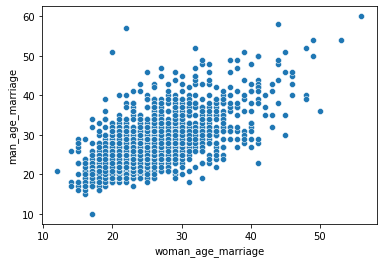

In [28]:
sns.scatterplot(data=divorce, x="woman_age_marriage", y="man_age_marriage")
plt.show()

NameError: name 'plt' is not defined

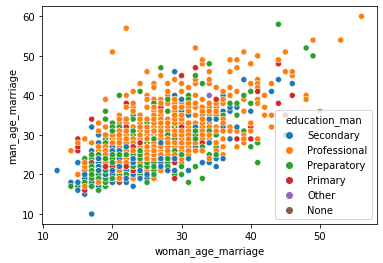

In [29]:
sns.scatterplot(data=divorce,
x="woman_age_marriage",
y="man_age_marriage",
hue="education_man")
plt.show()

## finalizado o modulo com sucesso 